In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

wine_data="winemag-data_first150k.csv"
wine_df = pd.read_csv(wine_data)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
wine_df.count()

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [3]:
# wine_df["country"].value_counts()

In [4]:
# Clean Dataframe with only country, designation, points, price, province, and winery.
wine2_df=wine_df.drop(columns= ["Unnamed: 0","description","region_1","region_2"], axis=1)
wine2_df.head()

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude


In [5]:
#Removed wines missing data
wine3_df=wine2_df.dropna()
# wine3_df.count()
wine3_df

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
5,Spain,Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
6,Spain,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
7,Spain,Carodorum Único Crianza,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
8,US,Silice,95,65.0,Oregon,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm


In [6]:
wine4_df = wine3_df[['province',"winery",'points','price']]#.groupby(['province'],as_index=False)
# # type(wine4_df)
wine4_df
# wine4_df["price"].max()

,province,winery,points,price
0,California,Heitz,96,235.0
1,Northern Spain,Bodega Carmen Rodríguez,96,110.0
2,California,Macauley,96,90.0
3,Oregon,Ponzi,96,65.0
4,Provence,Domaine de la Bégude,95,66.0
5,Northern Spain,Numanthia,95,73.0
6,Northern Spain,Maurodos,95,65.0
7,Northern Spain,Bodega Carmen Rodríguez,95,110.0
8,Oregon,Bergström,95,65.0
9,California,Blue Farm,95,60.0


In [12]:
# wine5_df = wine4_df[['province',"winery",'points','price']]
wine5_gr=wine4_df.groupby("province")
wine6_gr=wine5_gr.mean()
# wine6_gr
wine6_gr["price"].max()

96.25

In [8]:
# wine_winery_df=wine4_df["winery"]
# wine_winery_df.count()

In [9]:
# wine4_Pro_Points=wine4_df["province","points"].mean()
# wine_Pro_Points

In [10]:
# wine4_Pro_Price=wine4_df["province","price"].mean()
# wine4_Pro_Price

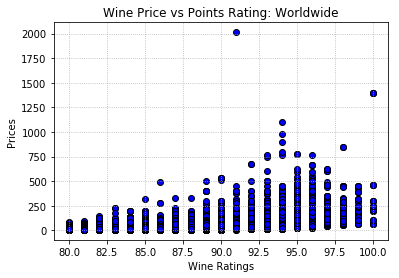

In [23]:
plt.scatter(wine3_df["points"],wine3_df["price"],Facecolors="blue", edgecolors="black")
 # Create a title, x label, and y label for our chart
plt.title("Wine Price vs Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("Price_Rating.png",dpi=200)

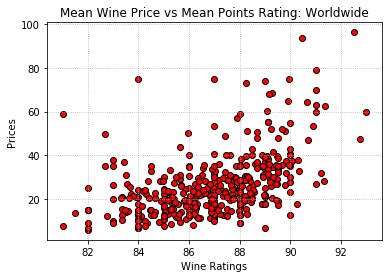

In [20]:
plt.scatter(wine6_gr["points"],wine6_gr["price"], Facecolors="red", edgecolors="black")
 # Create a title, x label, and y label for our chart
plt.title("Mean Wine Price vs Mean Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("Mean_Price_Rating.png",dpi=200)

In [ ]:
wine_df["points"].value_counts()

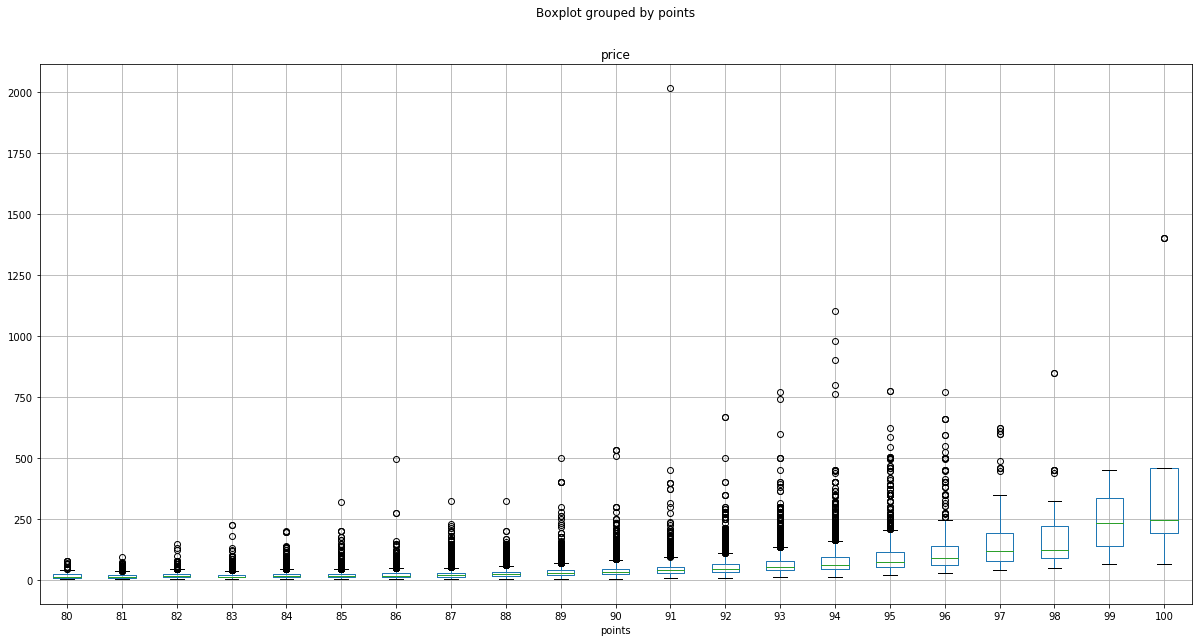

In [21]:
# Create a boxplot to compare price and points
wine3_df.boxplot("price", by="points", figsize=(20, 10),showfliers=(True))

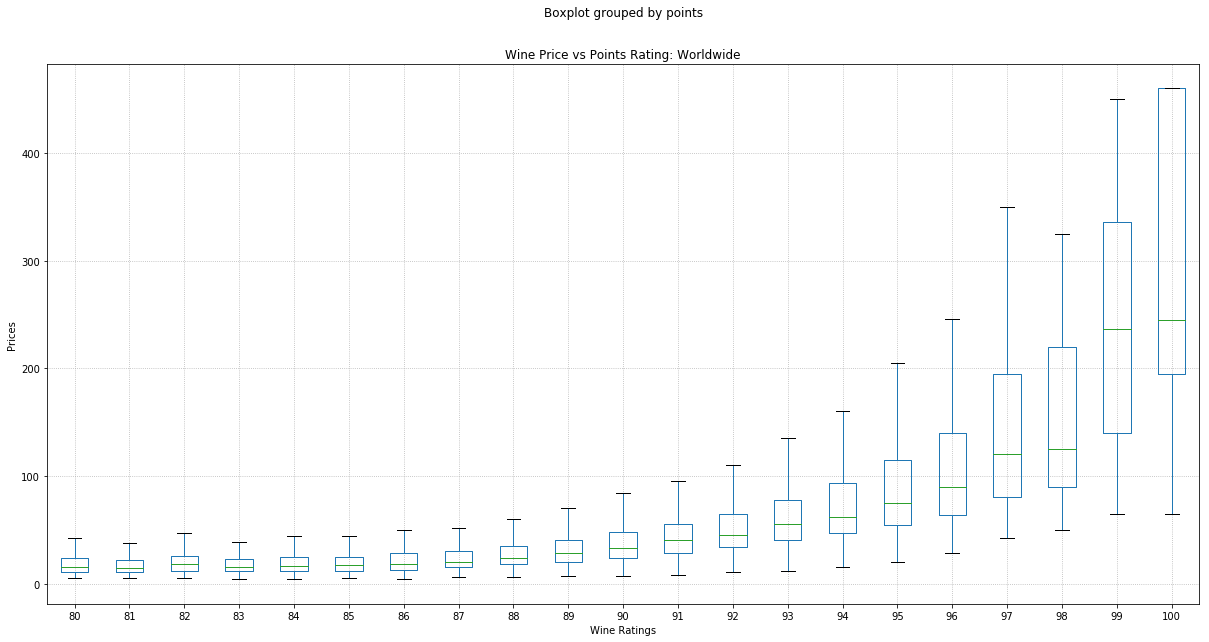

In [25]:
# Create a boxplot to compare price and points
wine3_df.boxplot("price", by="points", figsize=(20, 10),showfliers=(False))
plt.title("Wine Price vs Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("BoxPlot_Price_Rating.png",dpi=200)

In [ ]:
# Create a boxplot to compare price and points
wine3_df.boxplot("points", by="price", figsize=(20, 10),showfliers=(False))

In [ ]:
# Perform the ANOVA
# stats.f_oneway(group1, group2, group3, group4)

In [ ]:
wine_PPPro_df = wine_df[wine_df.type == "province"].groupby(["points", "price"]).mean()

In [ ]:
Wine_PPP_df = wine_df[['province','points','price']].groupby(['province'],as_index=False)
Wine_PPP_df.mean().sort_values(by=["points","price"],ascending=True)

In [ ]:
Wine_PPP_df = wine_df[['country','points','price']].groupby(['country'],as_index=False)
Wine_PPP_df.mean().sort_values(by=["points","price"],ascending=True)

In [ ]:
Wine_PPPro_df = wine_df[['province','points','price']].groupby(['province'],as_index=False)
Wine_PPPro_df.mean().sort_values(by=["points","price"],ascending=True)

In [ ]:
# Calculate Independent (Two Sample) T-Test
# stats.ttest_ind(Wine_PPP_df["points"], Wine_PPP_df["price"], equal_var=False)

In [ ]:
# Create a boxplot to compare price and points
# Wine_PPP_df.plot("price", by="points")